### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
#Checking data frame properties
data.shape

(12684, 26)

In [5]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

#### 2. Investigate the dataset for missing or problematic data.

Checking unique values in various categorical columns; this is to ensure no data cleaning is required due to typos and other such errors.

In [6]:
print(data.destination.unique())
print(data.passanger.unique())
print(data.weather.unique())
print(data.temperature.unique())
print(data.time.unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']


In [7]:
print(data.coupon.unique())
print(data.expiration.unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']


In [8]:
print(data.maritalStatus.unique())
print(data.gender.unique())
print(data.age.unique()) # Result is surprising that some values are age groups (e.g., below21) vs some values are ages (e.g., 46)
print(data.has_children.unique())

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
[1 0]


In [9]:
print(data.education.unique())
print(data.occupation.unique())
print(data.income.unique())
print(data.car.unique())

['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
[nan 'Scoo

Finding: For 'car' variable, we see some NaN so we should check missing values for this later. Also, Mazda5 is a specific car whereas other responses describe car type or car condition or 'do not drive'. 

In [10]:
print(data.Bar.unique())
print(data.CoffeeHouse.unique())
print(data.CarryAway.unique())
print(data.RestaurantLessThan20.unique())
print(data.Restaurant20To50.unique())

['never' 'less1' '1~3' 'gt8' nan '4~8']
['never' 'less1' '4~8' '1~3' 'gt8' nan]
[nan '4~8' '1~3' 'gt8' 'less1' 'never']
['4~8' '1~3' 'less1' 'gt8' nan 'never']
['1~3' 'less1' 'never' 'gt8' '4~8' nan]


For frequency variables by destination type, there are 'NaN' values across all. The good part is that the values are consistent without typos. 

In [11]:
print(data.toCoupon_GEQ5min.unique())
print(data.toCoupon_GEQ15min.unique())
print(data.toCoupon_GEQ25min.unique())
print(data.direction_same.unique())
print(data.direction_opp.unique())
print(data.Y.unique())

[1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]


In [12]:
# Checking the number of NaN in each column
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Finding: 'car' variable is not a useful variable because it is missing for 12576/12684 (i.e., 99%+) of responses. 
The missing rate for visit frequency variables is pretty low (<2%). 

In [13]:
#Checking the subset of data for which one of the destination types (e.g., Coffee House) is NaN
data_dest_check = data.loc[data['CoffeeHouse'].isnull()]
data_dest_check.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
498,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
500,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,1
501,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,1
502,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,0
503,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
504,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,0


No specific takeaways from this analysis.

#### 3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
# First, we remove the 'car' column from the dataset
# Then we remove all null values. Since the missing rate is low, it should not affect the conclusions from the analysis.
data2 = data.drop(columns=['car']).dropna()
data2.isnull().sum() # No more null values

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

#### 4. What proportion of the total observations chose to accept the coupon? 



In [15]:
print("Proportion of total observations that chose to accept the coupon is: ", data2['Y'].mean())

Proportion of total observations that chose to accept the coupon is:  0.5693352098683666


#### 5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

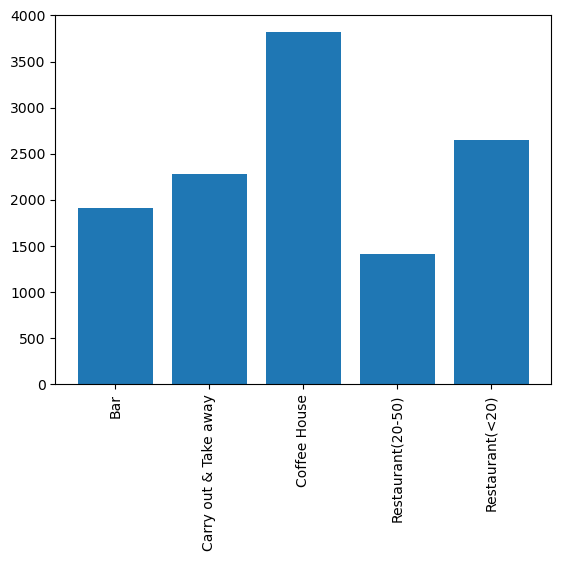

In [16]:
plt.bar(x=data2.groupby('coupon')[['coupon']].value_counts().index, height=data2.groupby('coupon')[['coupon']].value_counts())
plt.xticks(rotation=90)

#### 6. Use a histogram to visualize the temperature column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

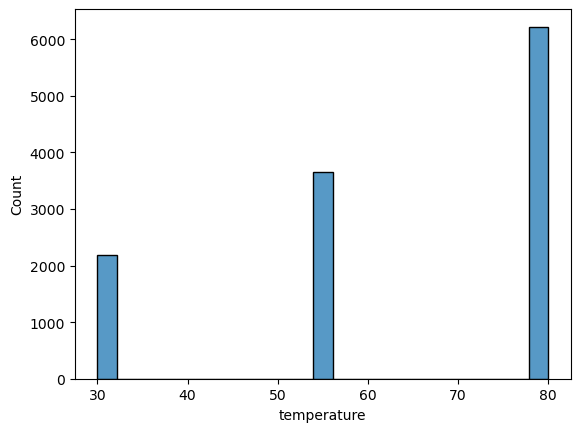

In [17]:
sns.histplot(data2['temperature'])

Finding: temperature only takes select values instead of a continuous Farenheit or Celsius range. We can essentially think of it as a categorical variable representing weather as 'cold', 'pleasant' and 'hot'. 

In [18]:
#Create a new column where temperature is converted into a categorical temperature_type variable
#Create a function first
def temperature_to_type(temp):
    if temp == 30:
        return 'cold'
    elif temp == 55:
        return 'pleasant'
    elif temp == 80:
        return 'hot'
    else: 
        return null

data2['temperature_type'] = data2['temperature'].apply(temperature_to_type)
#Check the unique values of the new column
print(data2['temperature_type'].unique())

['pleasant' 'hot' 'cold']


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
data_bar = data2.loc[data2['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [20]:
print("Proportion of Bar observations that chose to accept the coupon is: ", data_bar['Y'].mean())

Proportion of Bar observations that chose to accept the coupon is:  0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
data_bar_le_3 = data_bar.loc[data_bar['Bar'].isin(['never','less1','1~3'])]
data_bar_gt_3 = data_bar.loc[data_bar['Bar'].isin(['4~8','gt8'])]
#print(data_bar.shape, data_bar_le_3.shape, data_bar_gt_3.shape)
print("Proportion of Bar observations who visit bar 3 or fewer times that chose to accept the coupon is: ", data_bar_le_3['Y'].mean())
print("Proportion of Bar observations who visit bar 4 or more times that chose to accept the coupon is: ", data_bar_gt_3['Y'].mean())

Proportion of Bar observations who visit bar 3 or fewer times that chose to accept the coupon is:  0.37267441860465117
Proportion of Bar observations who visit bar 4 or more times that chose to accept the coupon is:  0.7616580310880829


It can be clearly observed that the acceptance rate in people who visit Bar 3 or fewer times is far lower than the rest of the sample.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
data_bar_test1 = data_bar.loc[data_bar['Bar'].isin(['1~3','4~8','gt8']) & data_bar['age'].isin(['46','26','31','41','50plus','36'])]
print("Proportion of Bar observations who visit bar more than once a month and are over the age of 25 that chose to accept the coupon is: ", data_bar_test1['Y'].mean())
# Pasting the overall acceptance rate from the code above for sake of comparison
print("Proportion of Bar observations that chose to accept the coupon is: ", data_bar['Y'].mean())

Proportion of Bar observations who visit bar more than once a month and are over the age of 25 that chose to accept the coupon is:  0.6898263027295285
Proportion of Bar observations that chose to accept the coupon is:  0.41191845269210664


Finding: The acceptance rate in the test sample is clearly higher than the full sample (and hence 'all others' as well)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [23]:
data_bar_test2 = data_bar.loc[data_bar['Bar'].isin(['1~3','4~8','gt8'])]
print("Proportion of Bar observations who visit bar more than once a month that chose to accept the coupon is: ", data_bar_test2['Y'].mean())
data_bar_test3 = data_bar.loc[data_bar['passanger'].isin(['Alone','Friend(s)','Partner']) & (data_bar['passanger'].isin(['Farming Fishing & Forestry'])==False)]
print("Proportion of Bar observations  who had passengers that were not a kid and had occupations other than farming, fishing, or forestry that chose to accept the coupon is: ", data_bar_test3['Y'].mean())

Proportion of Bar observations who visit bar more than once a month that chose to accept the coupon is:  0.6853146853146853
Proportion of Bar observations  who had passengers that were not a kid and had occupations other than farming, fishing, or forestry that chose to accept the coupon is:  0.4351367073880163


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [24]:
data_bar_test_6_1 = data_bar.loc[data_bar['Bar'].isin(['1~3','4~8','gt8']) & data_bar['passanger'].isin(['Alone','Friend(s)','Partner']) & data_bar['maritalStatus'].isin(['Unmarried partner' 'Single' 'Married partner' 'Divorced'])]
data_bar_test_6_2 = data_bar.loc[data_bar['Bar'].isin(['1~3','4~8','gt8']) & data_bar['age'].isin(['21','26','below21'])]
data_bar_test_6_3 = data_bar.loc[data_bar['RestaurantLessThan20'].isin(['4~8','gt8']) & data_bar['income'].isin(['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500'])]
print("Acceptance rate for first subset is: ", data_bar_test_6_1['Y'].mean())
print("Acceptance rate for first subset is: ", data_bar_test_6_2['Y'].mean())
print("Acceptance rate for first subset is: ", data_bar_test_6_3['Y'].mean())

Acceptance rate for first subset is:  nan
Acceptance rate for first subset is:  0.7195121951219512
Acceptance rate for first subset is:  0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Findings:
Based on the analysis above, I think that:
* People who visit bars often (4 or more times a month) are more likely to accept a coupon
* Passenger in the car and age affect the likelihood of accepting a coupon
* Visiting cheap restaurants and income may *not* be a good indicator of likelihood to accept a coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

We can efficiently use groupby function to calculate the acceptance rate by sub-groups

In [25]:
data2.groupby('destination')[['Y']].mean()

,Y
destination,
Home,0.508266
No Urgent Place,0.634003
Work,0.503968


Finding: As expected, acceptance rate is higher if the destination is not an urgent place.

In [30]:
data2.groupby(['coupon'])[['Y']].mean()

,Y
coupon,
Bar,0.411918
Carry out & Take away,0.737719
Coffee House,0.496331
Restaurant(20-50),0.446013
Restaurant(<20),0.709009


Finding: Acceptance rate is inherently higher for carry out & take away and cheap restaurants. 

In [27]:
data2.groupby(['coupon', 'temperature_type'])[['Y']].mean()

Y
coupon                temperature_type          
Bar                   cold              0.330000
                      hot               0.410000
                      pleasant          0.449069
Carry out & Take away cold              0.760504
                      hot               0.730845
                      pleasant          0.720803
Coffee House          cold              0.441472
                      hot               0.526980
                      pleasant          0.452010
Restaurant(20-50)     cold              0.351351
                      hot               0.484511
                      pleasant          0.427350
Restaurant(<20)       cold              0.537285
                      hot               0.759840
                      pleasant          0.730586

Finding: Temperature affects acceptance rate for coffee house and cheap restaurants. For both, increase in temperature increases the acceptance rate to a certain extent. 

### Recommendations and next steps
